In [994]:
import sys
import pandas as pd
import numpy as np

# 自行编写的包
sys.path.append('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment')
sys.path.append('/usr/local/stata17/utilities')

# Stata
from pystata import config

# GPA
config.init('mp')

In [995]:
df_raw = pd.read_csv('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/DataSets/SEM_MAF_2014_2021.csv')
df_raw['close_chg_l1'] = df_raw['close_chg'].shift(-1)
df_fin = df_raw[['img_neg', 'tex_neg', 'SENT_INDEX_R_EX', 'opt_profit']]
df_raw

,Unnamed: 0,trade_date,ts_code,CON_YEAR,CON_OR,CON_NP,CON_EPS,CON_NA,CON_PB,CON_PS,...,RIPO_R,SR_R,l1_TURN_R,lnPD_R,SENT_INDEX_R,SENT_INDEX_EX,SENT_INDEX_DEX,SENT_INDEX_R_EX,SENT_INDEX_R_DEX,close_chg_l1
0,7,20140102,000985.SH,2014,3.034892e+09,27421.678403,0.6857,2.017385e+09,1.3334,0.8863,...,-0.429099,15.745780,-0.003943,-0.208500,-1.191905,-0.571980,-0.588495,-0.435412,-0.451046,-0.907044
1,18,20140103,000985.SH,2014,3.033876e+09,27421.601209,0.6857,2.017584e+09,1.3213,0.8787,...,-0.429099,15.745780,-0.004333,-0.208500,-1.182604,-0.598652,-0.588830,-0.502679,-0.452930,-2.471193
2,29,20140106,000985.SH,2014,3.033345e+09,27412.012060,0.6854,2.027389e+09,1.2895,0.8619,...,-0.429099,15.745780,-0.003813,-0.208500,-1.175354,-0.623006,-0.589509,-0.563137,-0.455863,0.385618
3,40,20140107,000985.SH,2014,3.028546e+09,27384.608096,0.6846,2.027386e+09,1.2917,0.8647,...,-0.429099,15.745780,-0.003643,-0.208500,-1.172984,-0.644795,-0.590505,-0.617575,-0.459753,0.416474
4,51,20140108,000985.SH,2014,3.028892e+09,27355.547003,0.6838,2.028490e+09,1.2935,0.8663,...,-0.429099,15.745780,-0.004513,-0.208500,-1.185114,-0.664723,-0.591815,-0.666961,-0.464538,-1.143739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,21350,20211227,000985.SH,2021,6.389869e+09,53799.927579,0.7131,5.236956e+09,1.7835,1.4617,...,-0.374305,-2.832969,0.001832,0.097983,0.390557,1.170102,1.302731,0.960139,1.050876,0.716572
1940,21361,20211228,000985.SH,2021,6.391559e+09,53788.880275,0.7129,5.237495e+09,1.7933,1.4695,...,-0.346122,-2.832969,0.000582,0.097983,1.186737,1.127746,1.298598,0.909492,1.046500,-0.910999
1941,21372,20211229,000985.SH,2021,6.389955e+09,53725.674838,0.7120,5.237052e+09,1.7779,1.4571,...,-0.453585,-2.832969,0.000302,0.097983,0.013389,1.149856,1.293518,0.934144,1.040757,0.848972
1942,21383,20211230,000985.SH,2021,6.390729e+09,53695.625032,0.7116,5.236812e+09,1.7905,1.4672,...,-0.193822,-2.832969,0.000072,0.097983,0.972127,1.079838,1.288670,0.852272,1.035358,0.581746


In [996]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [997]:
# Normalise
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_fin)
data_scaled

array([[0.        , 0.        , 0.20350244, 0.48471755],
       [0.        , 0.333333  , 0.18236576, 0.48470364],
       [0.285714  , 0.142857  , 0.1633684 , 0.48297547],
       ...,
       [0.25      , 0.35      , 0.63384845, 0.34833308],
       [0.388889  , 0.277778  , 0.60812223, 0.34564522],
       [0.142857  , 0.047619  , 0.61147102, 0.34207361]])

In [998]:
# Fixed dimensions
input_dim = df_fin.shape[1]  # 8
encoding_dim = 1
# Number of neurons in each Layer [8, 6, 4, 3, ...] of encoders
input_layer = Input(shape=(input_dim,))
encoder_layer_1 = Dense(128, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder_layer_2 = Dense(128, activation="relu")(encoder_layer_1)
encoder_layer_3 = Dense(encoding_dim, activation="relu")(encoder_layer_2)

In [999]:
# Crear encoder model
encoder = Model(inputs=input_layer, outputs=encoder_layer_3)
# Use the model to predict the factors which sum up the information of interest rates.
encoded_data = pd.DataFrame(encoder.predict(data_scaled))
encoded_data.columns = ['factor_1']

df_en = pd.concat([encoded_data,
                   df_raw[['trade_date', 'close_chg', 'img_neg', 'tex_neg', 'SENT_INDEX_R_EX', 'opt_profit', 'trade_year']]],
                  axis=1).astype(dtype={'trade_date': 'str'})
# df_en.to_csv('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/DataSets/ENCODE_2014_2021.csv')
# df_en = pd.read_csv('/home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/DataSets/ENCODE_2014_2021.csv')
df_en

61/61 [==============================] - 0s 802us/step


,factor_1,trade_date,close_chg,img_neg,tex_neg,SENT_INDEX_R_EX,opt_profit,trade_year
0,0.023254,20140102,0.256463,0.000000,0.000000,-0.435412,15.279813,2014
1,0.020038,20140103,-0.907044,0.000000,0.333333,-0.502679,15.279489,2014
2,0.061379,20140106,-2.471193,0.285714,0.142857,-0.563137,15.239177,2014
3,0.020312,20140107,0.385618,0.000000,0.333333,-0.617575,15.123971,2014
4,0.063037,20140108,0.416474,0.333333,0.000000,-0.666961,15.001799,2014
...,...,...,...,...,...,...,...,...
1939,0.016409,20211227,0.008808,0.220339,0.152542,0.960139,12.253340,2021
1940,0.017832,20211228,0.716572,0.047619,0.238095,0.909492,12.230290,2021
1941,0.020509,20211229,-0.910999,0.250000,0.350000,0.934144,12.098412,2021
1942,0.018922,20211230,0.848972,0.388889,0.277778,0.852272,12.035713,2021


In [1000]:
# @formatter:off

In [1005]:
%%stata -d df_en -force
/*{*/
ge time=_n
tsset time
ge factor=factor_1
est clear

rename(img_neg) (SentIndex)
eststo: qui reg close_chg l(1/5).SentIndex i.trade_year
rename(SentIndex) (img_neg)

rename(factor) (SentIndex)
eststo: qui reg close_chg l(1/5).SentIndex i.trade_year
rename(SentIndex) (factor)

//输出回归结果
esttab using /home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/outputs/encode_to_return.rtf ,r type ///
keep(L*) ///
star(* 0.1 ** 0.05 *** 0.01) ///
stats( Year r2_a N, fmt(%3s %12.4f %12.0f)) ///
title("Table Encode to Return") mtitle("img_neg " "factor ") ///
nogaps  b(%12.4f)


. /*{*/
. ge time=_n

. tsset time

Time variable: time, 1 to 1944
        Delta: 1 unit

. ge factor=factor_1

. est clear

. 
. rename(img_neg) (SentIndex)

. eststo: qui reg close_chg l(1/5).SentIndex i.trade_year
(est1 stored)

. rename(SentIndex) (img_neg)

. 
. rename(factor) (SentIndex)

. eststo: qui reg close_chg l(1/5).SentIndex i.trade_year
(est2 stored)

. rename(SentIndex) (factor)

. 
. 
. //输出回归结果
. esttab using /home/ubuntu/notebooks/pycharm_projects/Investor-Sentiment/outpu
> ts/encode_to_return.rtf ,r type ///
> keep(L*) ///
> star(* 0.1 ** 0.05 *** 0.01) ///
> stats( Year r2_a N, fmt(%3s %12.4f %12.0f)) ///
> title("Table Encode to Return") mtitle("img_neg " "factor ") ///
> nogaps  b(%12.4f)

{\rtf1\ansi\deff0 {\fonttbl\f0\fnil Times New Roman;}
{\info {\author .}{\company .}{\title .}{\creatim\yr2023\mo5\dy25\hr05\min56}}
\deflang1033\plain\fs24
{\footer\pard\qc\plain\f0\fs24\chpgn\par}
{\pard\keepn\ql Table Encode to Return\par}
{
{\trowd\trgaph108\trleft-108\clb

In [1002]:
%%stata -d df_en -force -nogr
des
ge dt = date(trade_date, "YMD")
format dt %tdCCYYNNDD
ge factor=factor_1

twoway (line img_neg dt, yaxis(1) lpattern(solid)  lcolor(gs6))  , ///
ytitle("MediaImg SentIndex" ,axis(1))  ///
xtitle("") legend(off) scheme(sj) xsize(10) ylabel(, nogrid) ///
xlabel(, labgap(medium)) name(MediaImg,replace)

twoway (line factor dt, yaxis(1) lpattern(solid)  lcolor(gs6))  , ///
ytitle("Fusion SentIndex" ,axis(1))  ///
xtitle("") legend(off) scheme(sj) xsize(10) ylabel(, nogrid) ///
xlabel(, labgap(medium)) name(Fusion,replace)




. des

Contains data
 Observations:         1,944                  
    Variables:             8                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
factor_1        float   %9.0g                 
trade_date      str9    %9s                   
close_chg       double  %10.0g                
img_neg         double  %10.0g                
tex_neg         double  %10.0g                
SENT_INDEX_R_EX double  %10.0g                
opt_profit      double  %10.0g                
trade_year      long    %12.0g                
-------------------------------------------------------------------------------
Sorted by: 
     Note: Dataset has changed since last saved.

. ge dt = date(trade_date, "YMD")

. format dt %tdCCYYNNDD

. ge factor=factor_1

. 
. twoway (line img_

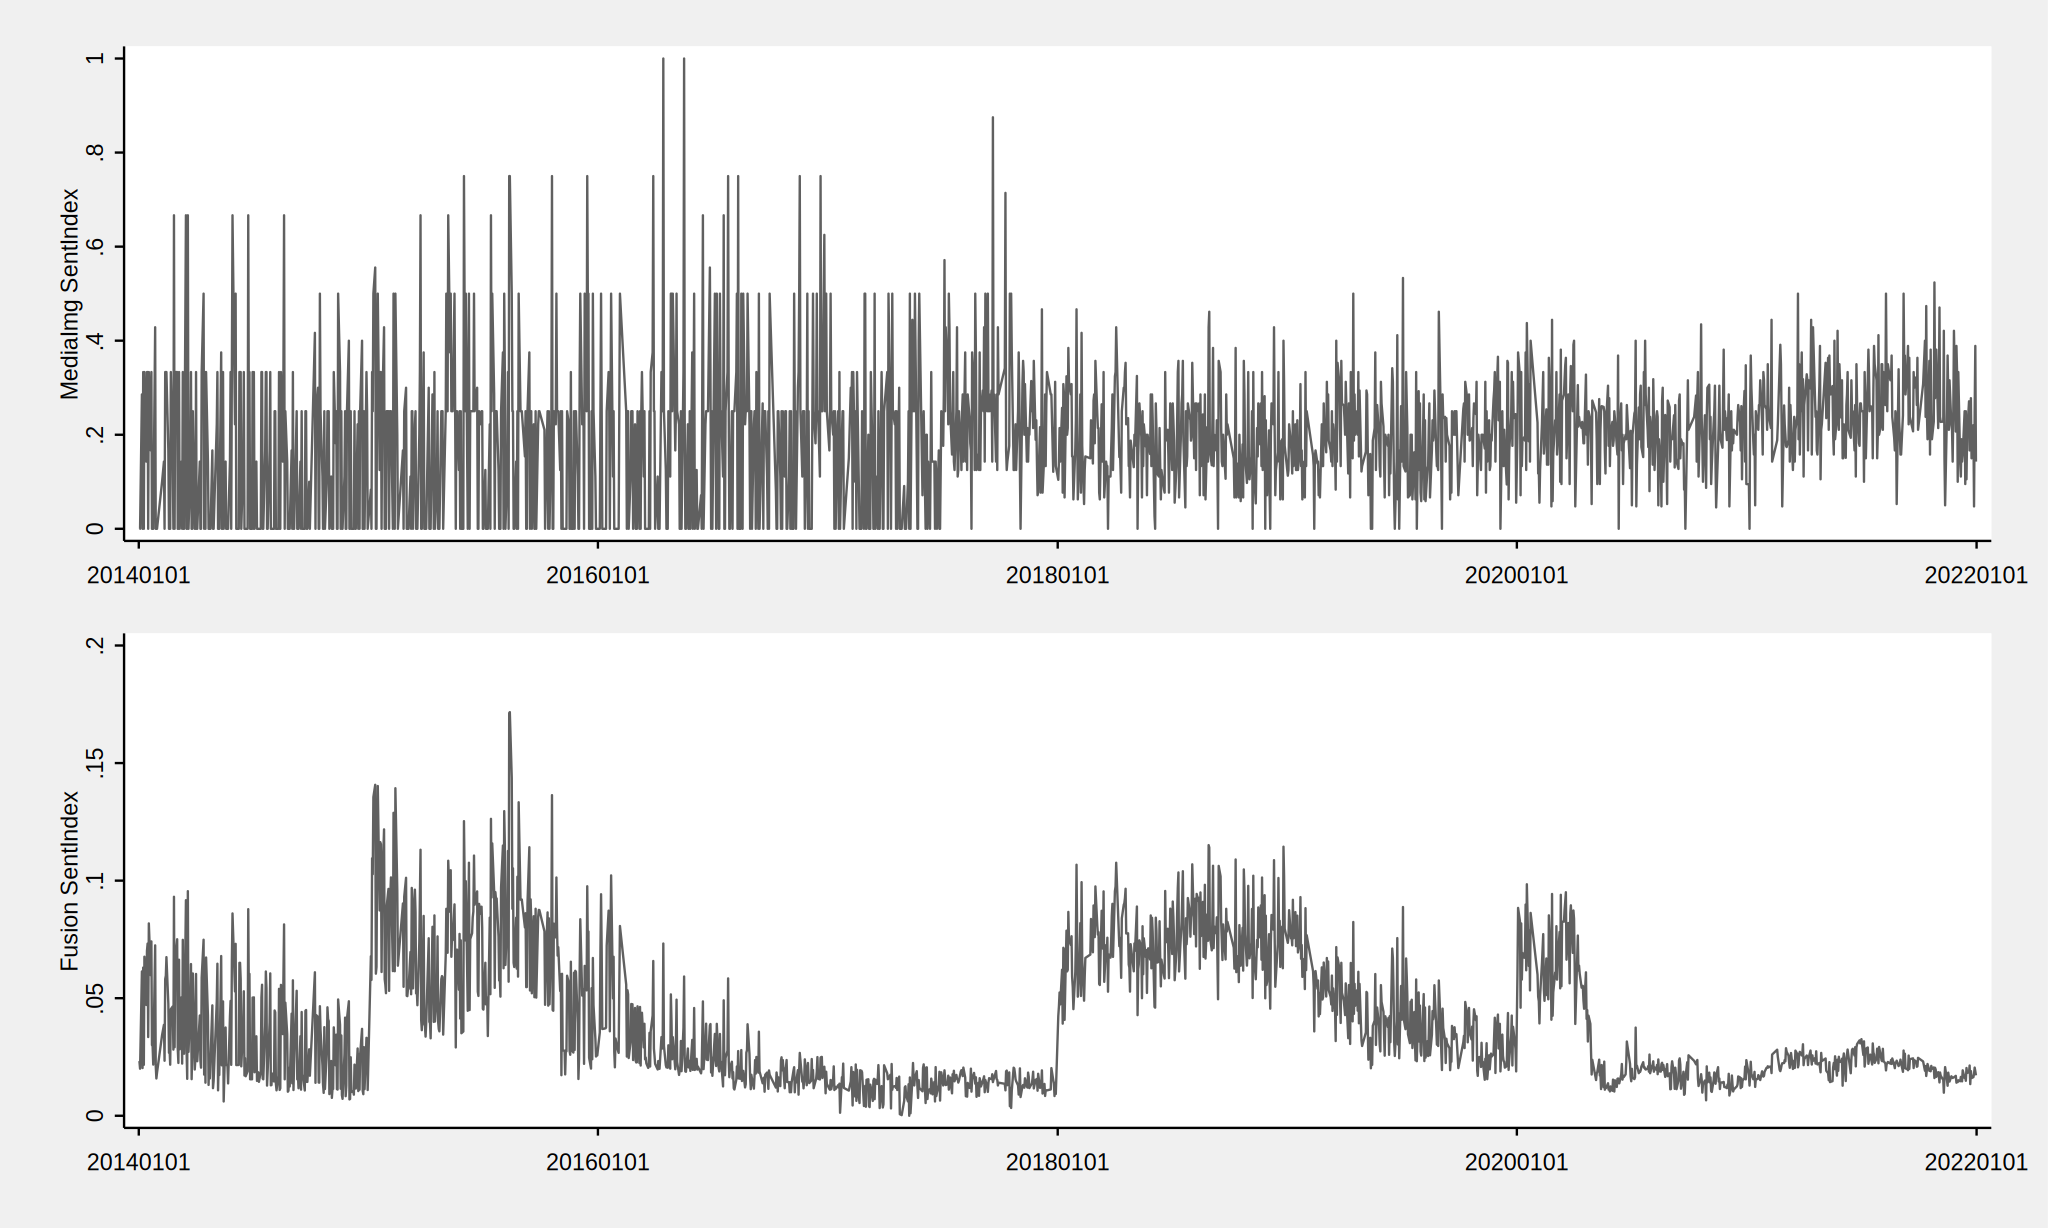

In [1003]:
%%stata -gw 10in -gh 6in
graph combine MediaImg Fusion, cols(1) name(c1,replace) scale(0.6) scheme(sj)